### 카드 이미지 정보를 데이터 정보로 변환

1. 카드별로 정리된 이미지를 불러옴. 
  - 이때 어느정도 옵셋으로 잘라내야 하는지는 반복적으로 이미지를 확인하여 결정
1. 회전이나 축소 등의 기능을 사용하여 이미지 정보 확인
  - 축소의 경우 눈으로도 확인하기 힘들어서 축소하지 않기로 함.
1. 최종적으로 신경망 모델에 사용할 데이터 형식으로 변환하여 피클로 저장함.
  - 피클 저장에 대한 부분은 실행파일 **make_img_data.py** 참조

In [1]:
from PIL import Image

In [2]:
im = Image.open('../png/S12.png')

In [9]:
im2 = im.crop((6, 6, 36, 66))
#im2.show()

In [5]:
im = Image.open('../png/H02.png')
im2 = im.crop((6, 6, 36, 66))
#im2.show()

In [14]:
im = Image.open('../png/C13.png')
im2 = im.crop((6, 6, 36, 66))
#im2.show()

In [28]:
im3 = im2.rotate(30)
#im3.show()

In [16]:
im4 = im3.resize((20, 40))
#im4.show()

In [24]:
im = Image.open('../png/S02.png')
im2 = im.crop((6, 6, 36, 66))
im4 = im2.resize((20, 40))
im4.show()

In [26]:
im = Image.open('../png/D02.png')
im2 = im.crop((6, 6, 36, 66))
im4 = im2.resize((20, 40))
im4.show()

In [43]:
im = Image.open('../png/S02.png')
im2 = im.crop((6, 6, 36, 66))
im5 = im2.convert('LA')
im5.show()

### 정리하기

1. 회전은 -30 ~ 30까지로 한다.
1. 축소하지는 않는다. 
    - 눈으로 확인하기에도 모양 구분이 힘들다.
1. 데이터 이미지 크기가 30x60 이다.
1. 흑백이미지로 변환한 후 저장한다.
1. 학습용과 테스트용을 구분하여 이미지를 생성한다.
    - 테스트용은 임의의 각도로 회전한 후 저장

In [42]:
im3 = im2.rotate(30, fillcolor='white')
im3.show()

In [37]:
im3 = im2.rotate(30, fillcolor='black')
im3.show()

In [59]:
im3 = im2.rotate(30, fillcolor='gray')
im3.show()

### 작업순서

1. 레이블에 맞는 이미지를 불러온다.
1. 설정되 영역만큼 잘라낸다.
1. 흑백영상으로 변환한다.
1. 설정된 영역만큼 회전한다.
  - (-30, -20, -10, 0, 10, 20, 30)
  - fillcolor; black / white
1. numpy 형식으로 변환한다.
1. 튜플 (np_img, label) 형식으로 저장한다.
1. 작업 완료 후 튜플을 피클로 저장한다.

In [7]:
import numpy as np

In [44]:
img_arr = np.array(im5)

In [60]:
print(img_arr.shape)

(60, 30)


In [8]:
im5 = im2.convert('L')
img_arr = np.array(im5)
print(img_arr)

[[210 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [57]:
im5.show()

In [3]:
import matplotlib.pyplot as plt

([], <a list of 0 Text yticklabel objects>)

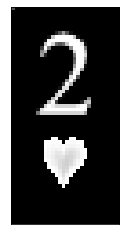

In [68]:
plt.imshow(img_arr, cmap='Greys', interpolation='nearest')
plt.xticks([])
plt.yticks([])